In [2]:
!pip uninstall -y numpy pandas scikit-learn joblib mlflow


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: joblib 1.5.1
Uninstalling joblib-1.5.1:
  Successfully uninstalled joblib-1.5.1
Found existing installation: mlflow 2.22.0
Uninstalling mlflow-2.22.0:
  Successfully uninstalled mlflow-2.22.0


In [4]:
!pip install --quiet \
  "numpy<=1.23.5" \
  "pandas==1.5.3" \
  "scikit-learn==1.5.1" \
  "joblib==1.2.0" \
  "mlflow==2.8.1"


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-ml 0.6.1 requires enum34, which is not installed.
azure-cli 2.71.0 requires azure-datalake-store~=1.0.0a0, but you have azure-datalake-store 0.0.53 which is incompatible.
azure-cli 2.71.0 requires azure-keyvault-keys==4.9.0b3, but you have azure-keyvault-keys 4.8.0 which is incompatible.
azure-cli 2.71.0 requires azure-mgmt-containerregistry==10.3.0, but you have azure-mgmt-containerregistry 13.0.0 which is incompatible.
azure-cli 2.71.0 requires azure-mgmt-resource==23.1.1, but you have azure-mgmt-resource 23.4.0 which is incompatible.
azure-cli 2.71.0 requires azure-mgmt-storage==22.1.0, but you have azure-mgmt-storage 23.0.0 which is incompatible.
azure-cli 2.71.0 requires websocket-client~=1.3.1, but you have websocket-client 1.8.0 which is incompatible.
azure-cli-core 2.71.0 requires argcomplete~=3.5.2

In [5]:
import numpy, pandas as pd, sklearn, joblib, mlflow, sys, platform
print("Python   :", sys.version.split()[0], "|", platform.platform())
print("NumPy    :", numpy.__version__)
print("pandas   :", pd.__version__)
print("sklearn  :", sklearn.__version__)
print("joblib   :", joblib.__version__)
print("mlflow   :", mlflow.__version__)


ModuleNotFoundError: No module named 'sklearn'

In [2]:
!pip install --quiet --no-deps --force-reinstall \
  scikit-learn==1.5.1 joblib==1.2.0


In [2]:
import sys, subprocess, importlib.metadata as md

print("➜  Python exe:", sys.executable)

# 1) Eski/bozuk kurulumları kaldır
subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y",
                "scipy", "threadpoolctl"], check=False)

# 2) Uyumlu ikili wheel’leri kur (no-deps → başka pakete dokunma)
subprocess.check_call(
    [sys.executable, "-m", "pip", "install", "--quiet", "--no-deps",
     "scipy==1.11.0", "threadpoolctl==3.1.0"]
)

print("✅  Kurulum tamam — sürümler:")
for p in ("scipy", "threadpoolctl"):
    print(f"  {p:<14}", md.version(p))


➜  Python exe: /anaconda/envs/jupyter_env/bin/python
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2


Reason for being yanked: License Violation


✅  Kurulum tamam — sürümler:
  scipy          1.11.0
  threadpoolctl  3.1.0


In [1]:
import numpy, pandas as pd, sklearn, joblib
print("NumPy :", numpy.__version__)
print("pandas:", pd.__version__)
print("sklearn:", sklearn.__version__)
print("joblib :", joblib.__version__)


NumPy : 1.23.5
pandas: 2.2.3
sklearn: 1.4.2
joblib : 1.2.0


In [10]:
import pandas as pd

df_raw = pd.read_csv(csv_path, sep=';', decimal=',', na_values=[-200])

# 1) 'Date' + 'Time' sütunlarını birleştir ve dt’ye çevir
df_raw["utc"] = pd.to_datetime(
    df_raw["Date"] + " " + df_raw["Time"],
    format="%d/%m/%Y %H.%M.%S", errors="coerce"
)

# 2) Geçersiz tarihler (NaT) varsa düş
df_raw.dropna(subset=["utc"], inplace=True)

# 3) İndeks olarak ayarla
df_raw.set_index("utc", inplace=True)
print("Ham şekil:", df_raw.shape)
df_raw.head(3)


Ham şekil: (9357, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
utc,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN


In [11]:
df_raw.keys()

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [12]:
df = df_raw[["CO(GT)", "PT08.S5(O3)"]].dropna()
df.columns = ["CO", "PM25"]

df["hour"]   = df.index.hour
df["dow"]    = df.index.dayofweek
df["lag_1"]  = df["PM25"].shift(1)
df["lag_24"] = df["PM25"].shift(24)
df.dropna(inplace=True)

df["target"] = df["PM25"].shift(-1)
df.dropna(inplace=True)

print("Model veri şekli:", df.shape)
df.head(3)


Model veri şekli: (7319, 7)


,CO,PM25,hour,dow,lag_1,lag_24,target
utc,,,,,,,
2004-03-11 19:00:00,6.9,1704.0,19,3,1409.0,1268.0,1654.0
2004-03-11 20:00:00,6.1,1654.0,20,3,1704.0,972.0,1285.0
2004-03-11 21:00:00,3.9,1285.0,21,3,1654.0,1074.0,821.0


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib, pathlib

X = df[["PM25", "hour", "dow", "lag_1", "lag_24"]]
y = df["target"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=150, random_state=0)
rf.fit(X_tr, y_tr)
mae = mean_absolute_error(y_te, rf.predict(X_te))
print("MAE:", round(mae, 2))

# model.pkl dosyasını kaydet
pathlib.Path("model").mkdir(exist_ok=True)
joblib.dump(rf, "model/model.pkl")


MAE: 117.31


['model/model.pkl']

In [27]:
%%writefile score.py
import json, joblib, numpy as np
def init():
    global mdl
    mdl = joblib.load("model.pkl")
def run(raw):
    d = json.loads(raw)
    X = [[d["PM25"], d["hour"], d["dow"], d["lag_1"], d["lag_24"]]]
    return {"pm25_next_1h": float(np.round(mdl.predict(X)[0], 2))}

%%writefile env.yml
name: rf-env
channels: [conda-forge]
dependencies:
  - python=3.10
  - scikit-learn==1.4.2
  - joblib==1.2.0


Overwriting score.py


In [47]:
# 🔧 1)  Aktif yorumlayıcıya kur
import sys, subprocess, importlib

cmd = [
    sys.executable, "-m", "pip", "install", "--quiet",
    "matplotlib==3.8.4", "seaborn==0.13.2"
]
print("➜ Kurulum başlıyor…")
subprocess.check_call(cmd)

# 🔄 2)  Modülleri içe aktararak test et
matplotlib = importlib.import_module("matplotlib")
seaborn    = importlib.import_module("seaborn")

print("matplotlib", matplotlib.__version__)
print("seaborn   ", seaborn.__version__)


➜ Kurulum başlıyor…
matplotlib 3.8.4
seaborn    0.13.2


,CO,PM25,hour,dow,lag_1,lag_24,target
count,7319.00,7319.00,7319.00,7319.00,7319.00,7319.00,7319.00
mean,2.13,1044.05,11.70,3.04,1044.13,1043.89,1043.93
std,1.44,405.90,6.91,2.02,405.91,405.55,405.83
min,0.10,221.00,0.00,0.00,221.00,221.00,221.00
1%,0.20,347.00,0.00,0.00,347.00,347.00,347.00
25%,1.10,745.00,6.00,1.00,745.00,745.00,745.00
50%,1.80,991.00,12.00,3.00,991.00,991.00,991.00
75%,2.80,1306.00,18.00,5.00,1306.00,1305.00,1305.50
99%,6.70,2109.64,23.00,6.00,2109.64,2109.64,2109.64
max,11.90,2523.00,23.00,6.00,2523.00,2523.00,2523.00


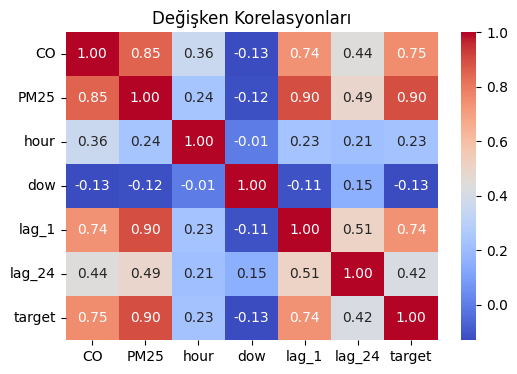

In [48]:
# temel istatistikler
display(df.describe(percentiles=[.01,.25,.5,.75,.99]).round(2))

# korelasyon ısı haritası
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(df[["CO","PM25","hour","dow","lag_1","lag_24","target"]].corr(),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Değişken Korelasyonları"); plt.show()


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

X = df[["PM25","hour","dow","lag_1","lag_24"]]
y = df["target"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=150, random_state=0)
rf.fit(X_tr, y_tr)

preds = rf.predict(X_te)
mae   = mean_absolute_error(y_te, preds)
r2    = r2_score(y_te, preds)
print(f"MAE  : {mae:.2f} µg/m³")
print(f"R²   : {r2:.3f}")

joblib.dump(rf, "model.pkl")


MAE  : 117.31 µg/m³
R²   : 0.859


['model.pkl']

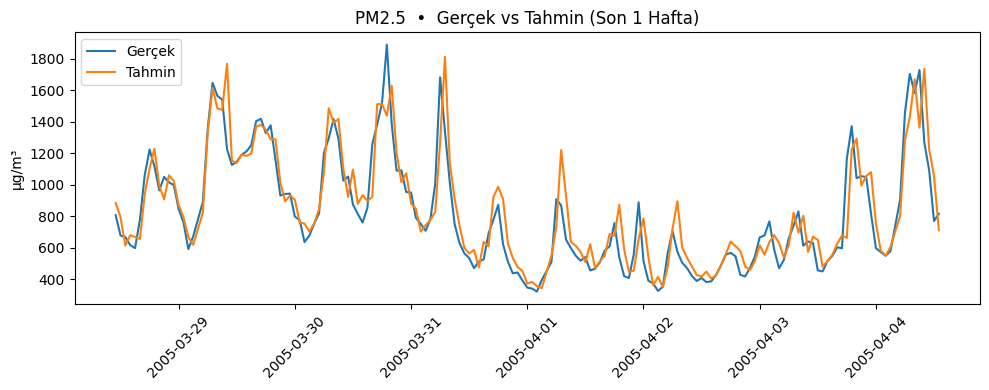

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(y_te[-168:].index, y_te[-168:], label="Gerçek")
plt.plot(y_te[-168:].index, preds[-168:], label="Tahmin")
plt.legend(); plt.title("PM2.5  •  Gerçek vs Tahmin (Son 1 Hafta)")
plt.ylabel("µg/m³"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


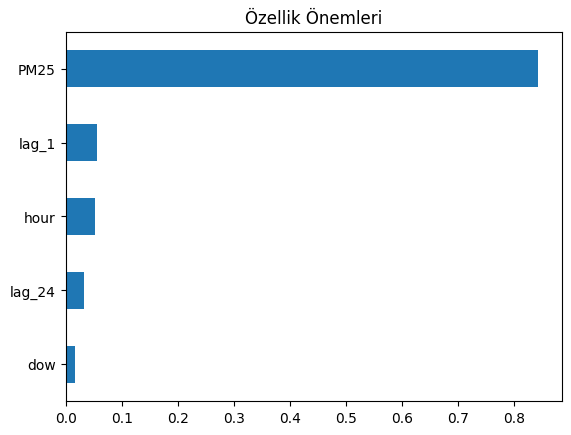

In [50]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()
feat_imp.plot(kind="barh"); plt.title("Özellik Önemleri"); plt.show()


In [51]:
latest = df.iloc[-1]                      # en son gözlem
sample = {
    "PM25":   float(latest["PM25"]),
    "hour":   int(latest["hour"]),
    "dow":    int(latest["dow"]),
    "lag_1":  float(latest["lag_1"]),
    "lag_24": float(latest["lag_24"])
}
rf_loaded = joblib.load("model.pkl")
forecast  = rf_loaded.predict([[*sample.values()]])[0]
print("Şu anki PM2.5:", sample["PM25"], "→ 1 saat sonra tahmin:", round(forecast,2), "µg/m³")


Şu anki PM2.5: 770.0 → 1 saat sonra tahmin: 711.64 µg/m³


/anaconda/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
import joblib, json
mdl = joblib.load("model.pkl")
payload = json.loads('{"PM25":40,"hour":14,"dow":2,"lag_1":38,"lag_24":52}')
y_hat = mdl.predict([[*payload.values()]])[0]
print(y_hat)


310.16


/anaconda/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
